In [35]:
import plotly.graph_objs as go 
import chart_studio.plotly as py

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
init_notebook_mode(connected=True)

In [53]:
data = dict(
    type='choropleth',
    locations=['AZ', 'CA', 'NY', 'LA'],  
    locationmode='USA-states',  # Map mode
    colorscale='Portland', # Color gradient
    text=['Arizona', 'California', 'New York', 'Las Vegas'], # Hover text
    z=[1.0, 2.0, 3.0, 4.0],  # Data values for coloring
    colorbar={'title': 'Colorbar Title'}
)

In [55]:
layout = dict(geo = {'scope':'usa'})

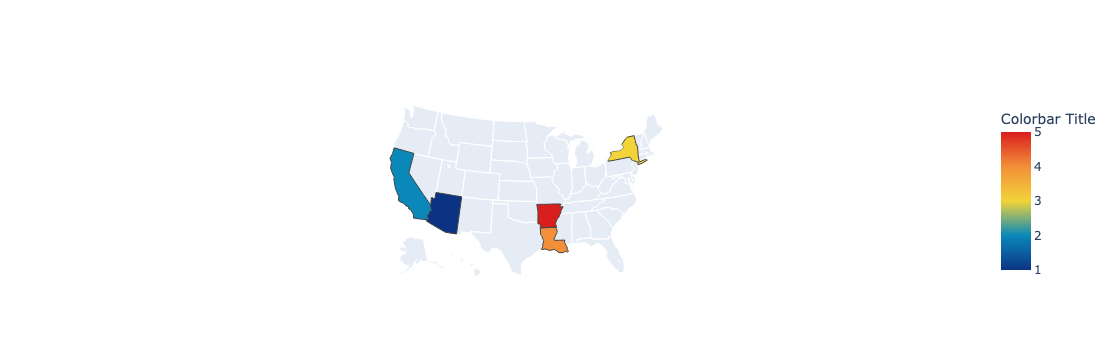

In [57]:
go.Figure(data = [data], layout = layout)

In [79]:
import pandas as pd
df = pd.read_csv("2011_US_AGRI_Exports")
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


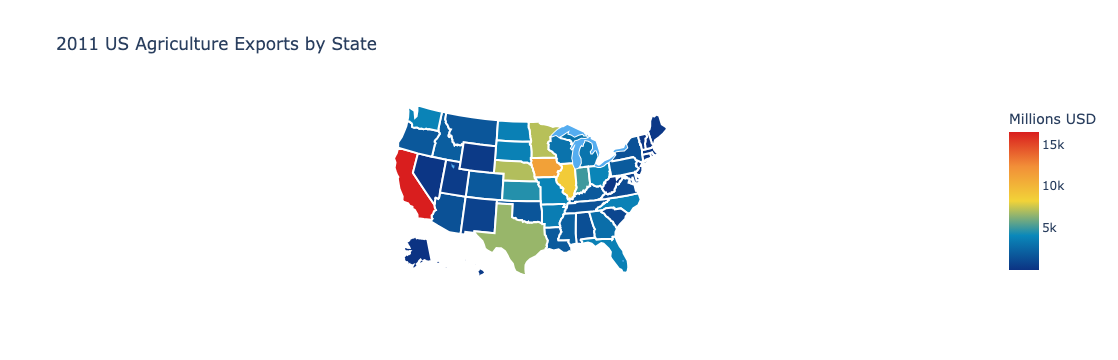

In [93]:
data = dict(
    type='choropleth',
    locations= df["code"],  
    locationmode='USA-states',  # Map mode
    colorscale='Portland', # Color gradient
    z= df["total exports"],  # Data values for coloring
    text = df["text"],
    marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
    colorbar = {'title':"Millions USD"}
    ) 

layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

go.Figure(data = [data], layout = layout)

In [71]:
data = dict(
    type='choropleth',
    locations=['United States', 'Canada', 'Mexico', 'Germany', "China"],  # Full country names
    locationmode='country names',  # Interpret locations as country names
    z=[50, 60, 70, 80, 90],  # Values for coloring
    colorscale='Blues',  # Color scale for the map
    colorbar={'title': 'Metric'}  # Title for the color bar
)

In [67]:
layout = dict(
    geo=dict(
        scope='world',  # Display the entire world
        projection=dict(type='natural earth'),  # Use the "Natural Earth" projection
    )
)

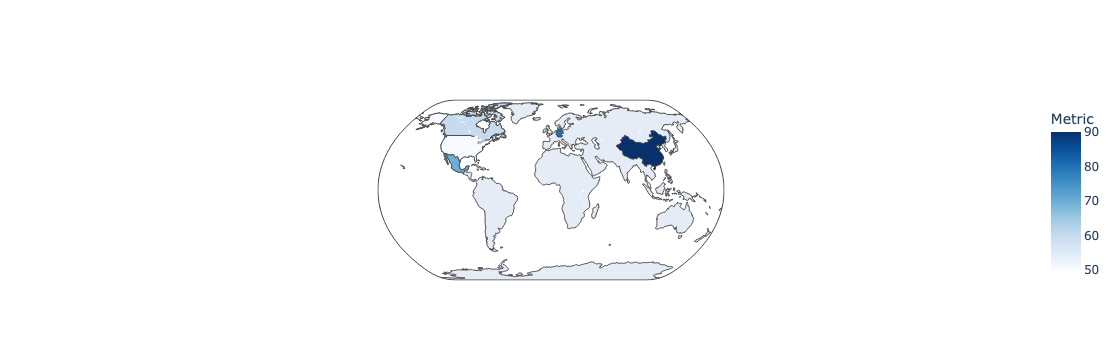

In [73]:
go.Figure(data = [data], layout = layout)

In [103]:
df2 = pd.read_csv('2014_World_GDP')
df2.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


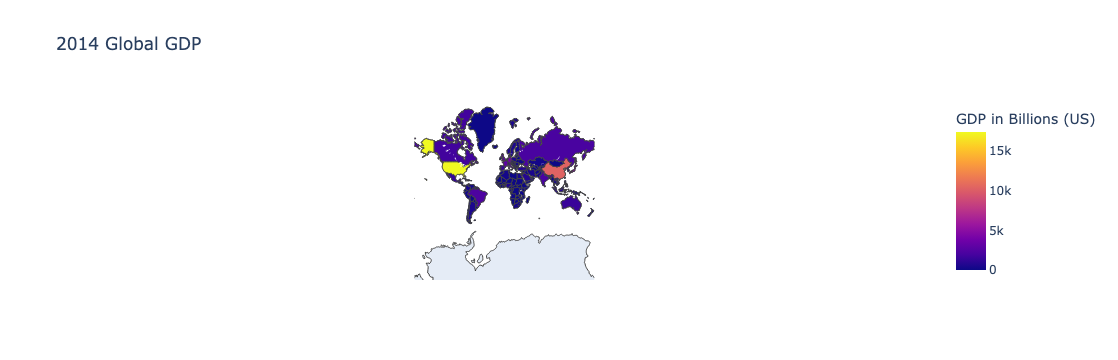

In [105]:
# Create the choropleth map
data = go.Choropleth(
    locations=df2['CODE'],  # ISO-3 country codes
    z=df2['GDP (BILLIONS)'],  # Values to plot
    text=df2['COUNTRY'],  # Hover text
    colorbar={'title': 'GDP in Billions (US)'}  # Colorbar title
)

# Define the layout
layout = go.Layout(
    title='2014 Global GDP',
    geo=dict(
        showframe=False,  # Hide map frame
        projection={'type': 'mercator'}  # Map projection
    )
)

# Combine data and layout into a figure
choromap = go.Figure(data=[data], layout=layout)

# Show the map
choromap.show()